Необходимо реализовать схему сверхплотного кодирования:

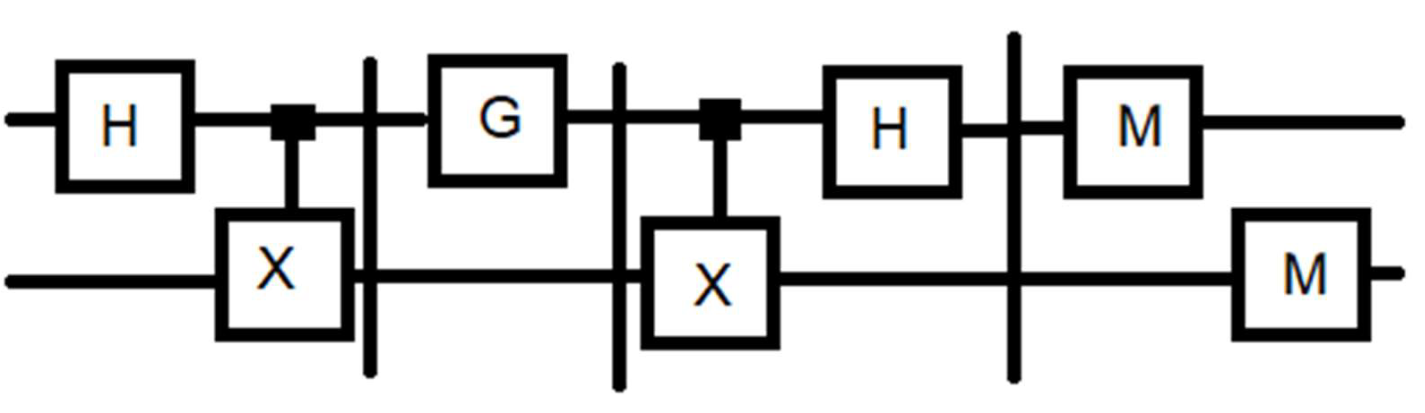

G – это применяемые гейты в зависимости от того, какое сообщение хочет передать Алиса:
* I – если Алиса передает 00
* Z – если Алиса передает 01
* X – если Алиса передает 10
* XZ – если Алиса передает 11


In [4]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram

In [2]:
def bell_circuit():
    # Функция для создания состояния Белла
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

In [5]:
def encode_circuit(qc, enc_qubit, msg):
    # Функция кодирования кубитов с использованием протокола плотного кодирования
    # qc - на вход подается текущая квантовая схема
    # enc_qubit - кубит, который мы будем кодировать
    # msg - кодируемое сообщение 
    # Выход: квантовая схема с добавленными гейтами энкодинга
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"Сообщение '{msg}' некорректно")
    if msg[0] == "1":
        qc.x(enc_qubit) # Если первый бит 1 - то используем на кодируемом бите гейт X
    if msg[1] == "1":
        qc.z(enc_qubit) # Если второй бит сообщения - 1, то используем на кодируемом бите гейт Z
    # комбинации этих двух гейтов помогут нам обработать все комбинации двух классических битов
    return qc

In [8]:
def decode_circuit(qc): # Для декодирования сообщения Боб должен просто использовать обратную цепь Белла
    qc.cx(0, 1)
    qc.h(0)
    return qc

In [9]:
# Создаем пару Белла и отдаем первый кубит Алисе, а второй - Бобу
qc = bell_circuit() # Пара Белла создается на кубитах в состояниях |0> и |0>
qc.barrier() # Барьер нужен для визуального отображения отдаления Алисы от Боба

message = '10' # Выбираем сообщение, которое хотим закодировать
qc = encode_circuit(qc, 0, message) # Алиса использует необходимые гейты на своем кубите
qc.barrier() # Алиса отдает свой кубит Бобу

# Получив кубит, Боб использует обратную цепь Белла на оба кубита
qc = decode_circuit(qc)

# Боб измеряет кубиты, чтобы прочитать сообщение
qc.measure_all()

# Итоговая схема:
qc.draw()

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

In [11]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)

{'10': 1024}


In [ ]:
def build_superdense_circuit(message):
    qc = bell_circuit()
    qc.barrier()
    
    qc = encode_circuit(qc, 0, message) 
    qc.barrier() 

    qc = decode_circuit(qc)

    qc.measure_all()
    
    return qc

In [ ]:
message = '00' 
qc = build_superdense_circuit(message)
qc.draw()

┌───┐      ░  ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░──░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░  ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──░─┤ X ├──────░──╫─┤M├
             └───┘ ░  ░ └───┘      ░  ║ └╥┘
meas: 2/══════════════════════════════╩══╩═
                                      0  1

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
    
print("Кодируемое сообщение: {}, расшифрованное сообщение: {}".format(message, max(counts)))
print(counts)

Кодируемое сообщение: 00, расшифрованное сообщение: 00
{'00': 1024}


In [ ]:
message = '01' 
qc = build_superdense_circuit(message)
qc.draw()

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ Z ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
    
print("Кодируемое сообщение: {}, расшифрованное сообщение: {}".format(message, max(counts)))
print(counts)

Кодируемое сообщение: 01, расшифрованное сообщение: 01
{'01': 1024}


In [ ]:
message = '10' 
qc = build_superdense_circuit(message)
qc.draw()

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
    
print("Кодируемое сообщение: {}, расшифрованное сообщение: {}".format(message, max(counts)))
print(counts)

Кодируемое сообщение: 10, расшифрованное сообщение: 10
{'10': 1024}


In [ ]:
message = '11' 
qc = build_superdense_circuit(message)
qc.draw()

┌───┐      ░ ┌───┐┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├┤ Z ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘└───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░────────────░─┤ X ├──────░──╫─┤M├
             └───┘ ░            ░ └───┘      ░  ║ └╥┘
meas: 2/════════════════════════════════════════╩══╩═
                                                0  1

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
    
print("Кодируемое сообщение: {}, расшифрованное сообщение: {}".format(message, max(counts)))
print(counts)

Кодируемое сообщение: 11, расшифрованное сообщение: 11
{'11': 1024}
